In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def rbf_kernel(x1, x2, sigma, lengthscale):
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)
    
    K = sigma * np.exp(-np.power(d, 2) / lengthscale)

    return K

def lin_kernel(x1, x2, sigma):
    if x2 is None:
        return sigma * x1.dot(x1.T)
    else:
        return sigma * x1.dot(x2.T)

def white_kernel(x1, x2, sigma):
    if x2 is None:
        return sigma * np.eye(x1.shape[0])
    else:
        return np.zeros(x1.shape[0], x2.shape[0])

def periodic_kernel(x1, x2, sigma, period, lengthscale):
    if x2 is None:
        d = cdist(x1, x1)
    else:
        d = cdist(x1, x2)
    
    return sigma * np.exp(-(2 * np.sin((np.pi / period) * np.sqrt(d)) ** 2) / lengthscale ** 2)

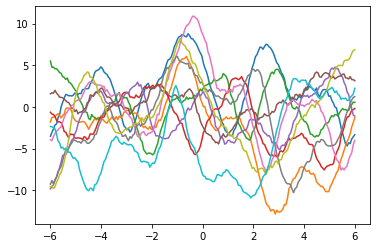

dog


In [3]:
# choose index set for marginal
x = np.linspace(-6, 6, 200).reshape(-1, 1)

# compute covar matrix (kernel = 'similarity' function)

# increasing lengthscale smooths out functions
# - large = change quickly; small = not
# - also determines how far we can reliably extrapolate from training data
# sigma is just the standard deviation
# - need to find optimal to avoid overfitting
# - small = larger variance
#K = rbf_kernel(x, None, 1.0, 1.0)

# increasing sigma increases variance in gradient
#K = lin_kernel(x, None, 10000.0)

# some sort of noise kernel?
# increasing sigma increases variance in height
#K = white_kernel(x, None, 100000)

# models functions which repeat themsleves exactly
# period is distance between repititions
#K = periodic_kernel(x, None, 10.0, 5.0, 10.0)

K1 = rbf_kernel(x, None, 15.0, 1.0)
K2 = periodic_kernel(x, None, 1.0, 5.0, 5.0)
K = K1 * K2

# create mean vec
mu = np.zeros(x.shape[0])

# draw 20 samples from Gauss dist
f = np.random.multivariate_normal(mu, K, 10)
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f.T)
plt.show()

print("dog")

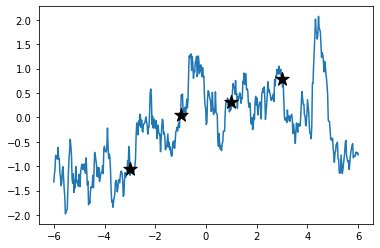

In [75]:
x = np.linspace(-3, 3, 4)
y = np.sin(2 * np.pi / x) + x * 0.1 + 0.3 * np.random.randn(x.shape[0])
x = np.reshape(x, (-1, 1))
y = np.reshape(y, (-1, 1))
x_star = np.linspace(-6, 6, 500)
x_star = np.reshape(x_star, (-1, 1))

#def gp_prediction(x1, y1, xstar, lengthscale, sigma, noise):
def gp_prediction(x1, y1, xstar, kernel, noise=0):
    k_starX = kernel(xstar, x1)
    k_xx = kernel(x1, None)
    if noise != 0:
        k_xx = k_xx + noise * np.eye(*k_xx.shape)
    k_starstar = kernel(xstar, None)
    
    mu = k_starX.dot(np.linalg.inv(k_xx)).dot(y1)
    var = k_starstar - (k_starX).dot(np.linalg.inv(k_xx)).dot(k_starX.T)
    
    return mu, var, xstar

#mu_star, var_star, x_star = gp_prediction(x, y, x_star, lambda x, y: rbf_kernel(x, y, 1.0, 1.0), 0.0)
#mu_star, var_star, x_star = gp_prediction(x, y, x_star, lambda x, y: lin_kernel(x, y, 2.0), 0.0005)
mu_star, var_star, x_star = gp_prediction(x, y, x_star, lambda x, y: periodic_kernel(x, y, 1.0, 5.0, 1.0), 0.0)
mu_star = np.reshape(mu_star, (1, -1))[0]
f_star = np.random.multivariate_normal(mu_star.T, var_star, 1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_star, f_star.T)
ax.scatter(x, y, 200, 'k', '*', zorder=10)